# Домашнее задание. Pandas

In [2]:
import pandas as pd
df = pd.read_csv('data/TSLA.csv');

1. Вывести все колонки из DataFrame

In [3]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


2. Посчитать среднюю цену закрытия акций Tesla, в период с открытия по 10.01.2012

In [9]:
df_orig = df.set_index('Date')
df_orig = df_orig.loc['2010-06-29':'2012-01-10']
df_orig['Close'].mean()

25.654458737113384

3. Вывести график цены закрытия 

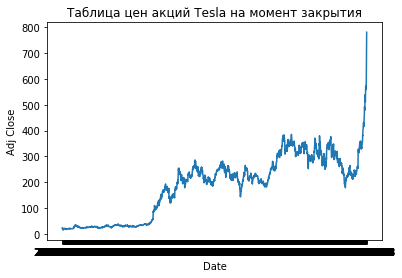

In [5]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Таблица цен акций Tesla на момент закрытия')
plt.show()

4. Нормализация 

Сейчас вы научитесь нормализовывать данные. Но сначала я объясню, зачем. <br>

Алгоритмы машинного обучения, как правило, работают лучше или сходятся быстрее, когда различные функции (переменные) имеют меньший масштаб. Поэтому перед обучением на них моделей машинного обучения данные обычно нормализуются.

Нормализация также делает процесс обучения менее чувствительным к масштабу функций. Это приводит к улучшению коэффициентов после тренировки.

Этот процесс повышения пригодности функций для обучения путем изменения масштаба называется масштабированием функций.

Вот формула, которую часто применяют для нормализации значений одного столбца:
$$ x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}, $$
где, понятное дело x - значение в конкретной строке выбранного столбца, xmax - максимальное значение этого столбца, а xmin - минимальное значение этого столбца.

Примените эту формулу к столбцу Open (используйте метод apply).

In [10]:
df['Open_norm'] = df['Open'].apply(lambda x: (x - df['Open'].min()) / (df['Open'].max() - df['Open'].min()))
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_norm
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,0.840012
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,0.850962
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,0.937237
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,0.948764
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000,1.000000


5. Что такое SMA (Simple Moving Average) с окном 12,15,30. 
Можно посмотреть внешние решения: 
- https://www.pythonpool.com/moving-average-python/   
- https://mrjbq7.github.io/ta-lib/

Простая скользящая средняя (SMA) — это тип индикатора технического анализа, используемый в торговле. Считается запаздывающим индикатором, который показывает среднюю цену актива за определенный период времени. SMA рассчитывается путем получения среднего значения определенного количества точек данных, обычно 12, 15 или 30. Длина периода, используемого в расчете, определяет чувствительность индикатора. Более длинные периоды дают более плавные линии и меньше ложных сигналов, в то время как более короткие периоды более чувствительны и генерируют больше ложных сигналов.


6. Построить график с ценой закрытия и посчитаным SMA 12,15,30

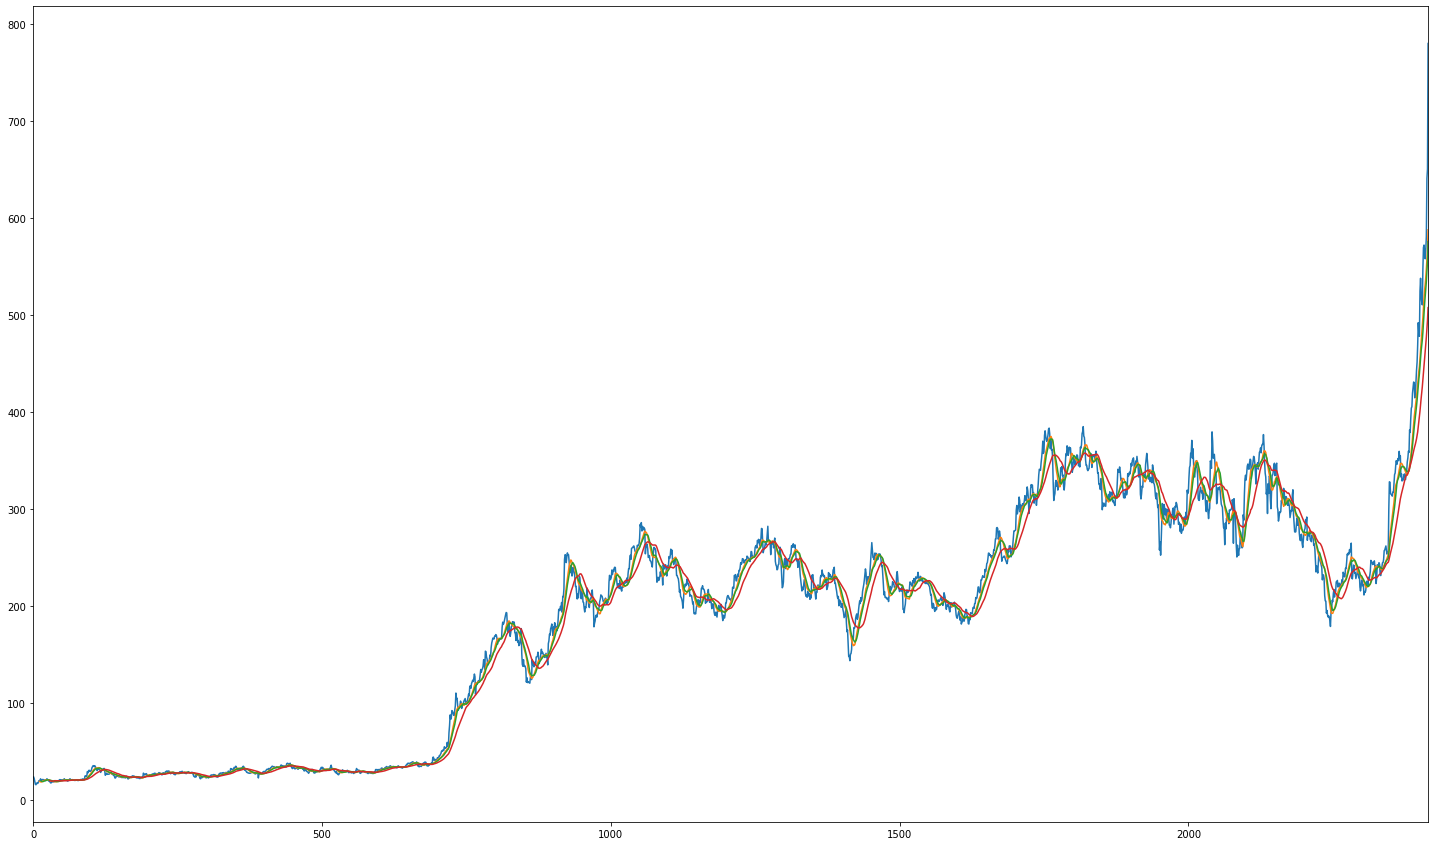

In [11]:
df['Adj Close'].plot(figsize=(25, 15))
df['Adj Close'].rolling(window=12).mean().plot()
df['Adj Close'].rolling(window=15).mean().plot()
df['Adj Close'].rolling(window=30).mean().plot()

7. Посмотрите на график и подумайте, о чем говорит SMA. Когда стоит начать покупать/продавать акции Tesla?

Когда цена закрытия выше SMA, это может означать, что акция является правильно выбранной покупкой. Если цена закрытия ниже SMA, это указывает на то, что было бы разумно продать акцию. SMA 30 следует за изменениями медленнее, чем SMA 12 и 15, поэтому обеспечивает долгосрочный обзор рынка.